    221104_exnode15_textnode_recognization
      1] OCR Tool test
        1. google ocr : 활용 tool 선정
            - Detects & bounding 함수  
            - key 지정 & detection
        2. keras-ocr  
            - package load
            - image load
            - plot the predictions (detection & recognization)
        3. tesseract ocr  
            - package load
            - image crop & recognization
       2] AI Business 
        4. google ocr : 상가 간판 detection & recognization            
           ----------------------------------------------------------------------
        5. 후기
            - OCR을 활용하여 구현하려는 서비스의 기획
              . 제공하는 지도앱은 최신내용의 서비스가 지연되므로, 이밎를 TEXT로 변환하여 정리하여 지도앱개발업체에 판매                
            - 목적에 부합 
              . 각 OCR 구현 TOOL을 활용하여 TEXT변환을 확인
              . 각 간판에 맞는 정확도를 판단 : 변환된 문자에 간판문자가 있는지 확인 
         -----------------------------------------------------------------------------
            - OCR 판독 TOOL을 활용하여 최신의 정보를 가져오려고 하였으며, 실제간판 문자내 ocr생성문자를 비교함.
              실제 활용을 위해서는 정교한 전처리가 필요할 것으로 판단됨.
            - 정교한 전처리와 정확성을 판단할 수 있는 이진모델을 활용하여 문자생성을 정교하게 실시하도록 하는 것이 필요하다고 판단됨.
            - OCR판독 TOOL 정확도가 개선이 필요하다고 판단되고. 가능성은 있다고 판단됨 
            - 지도앱은 최신정보 UPDATE가 일정기간이 필요하며, 그에 따른 정보의 신뢰성이 떨어지는 경우가 있으며, 
              지역에 따라 기간이 길어질 수 도 있슴.
              이 서비스의 구현 및 지도앱서비스에 대한 판매기획은 좋은 사업 기회가 될 수 있다고 판단 됨.

      1] OCR Tool test : gogool ocr tool를 활용하여 AI Business 실행
          1. google ocr : 활용할 수 있는 tool로 판단됨
            - Detects & bounding 함수  
            - key 지정 & detection
         2. keras-ocr : 시간이 많이 걸림, 한국어가 영어로 표현됨, detection은 잘 되고 있슴 
            - package load
            - image load
            - plot the predictions (detection & recognization)
         3. tesseract ocr : 일부 영역이 문자가 인식안됨, detection 이 잘 안됨 

In [1]:
#0 package import
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#1. google ocr ...  Detects & bounding 함수
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    text_list = list(map(lambda x: x.description, texts))
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return text_list

In [3]:
#1. google ocr ...  key 지정 & detection
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/16_excode/221104_exnode16_text_recog/images/formal-air-367603-67a3df2b48b3.json'

# 입력 이미지 경로를 지정해 주세요.
path = os.getenv('HOME')+'/aiffel/16_excode/221104_exnode16_text_recog/images/img_test.jpg'  

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
img_text = detect_text(path)


total 1436
-rw-r--r-- 1 root root  23062 Nov  6 01:30 221104_exnode15_text_recognization.ipynb
-rw-r--r-- 1 root root 360901 Nov  6 08:02 221104_exnode15_text_recognization_report_1.ipynb
-rw-r--r-- 1 root root 710350 Nov  6 08:51 221104_exnode15_text_recognization_report_2.ipynb
-rw-r--r-- 1 root root 361451 Nov  6 00:13 221104_exnode15_text_recognization_report.ipynb
drwxr-xr-x 2 root root   4096 Nov  6 01:04 images
Texts:

"따뜻한 봄햇살
기분이 좋아져요!
행복한 하루 보내세요~♡
*
t"

"따뜻한"

"봄"

"햇살"

"기분"

"이"

"좋아"

"져요"

"!"

"행복한"

"하루"

"보내세요"

"~"

"♡"

"*"

"t"
bounds: (440,50),(487,49),(488,124),(441,125)


In [4]:
#2 keras-ocr ... package load
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
#2 keras-ocr ... package load
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fcafefiles.naver.net%2F20160409_79%2F365sky_1460189459751uURbc_JPEG%2F20160407164624.jpg&type=sc960_832',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTAyMDRfNTUg%2FMDAxNjEyNDI4ODQxNDI2.j-rHG8fAZEg88aTzkzL8wumZjixXWeFCb8_H86loaVQg.t6PKzYiSaxHpVHnpoR5c3umS3vZGtAQjQsUFDg3acDYg.JPEG.haptu8989ok%2F1612428326820.jpg&type=sc960_832'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

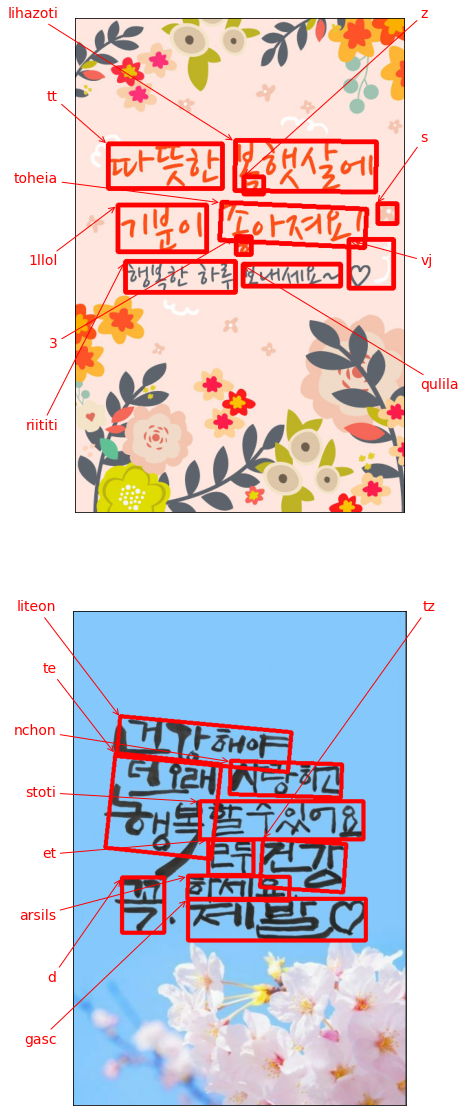

In [6]:
#2 keras-ocr ... plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [7]:
#3. tesseract ocr .. package load
import pytesseract
from PIL import Image
from pytesseract import Output


In [8]:
#3. tesseract ocr ... image crop

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/16_excode/221104_exnode16_text_recog/images/'
img_file_path = work_dir + 'img_test.jpg'  #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0000.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0001.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0002.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0003.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0004.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0005.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0006.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0007.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0008.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0009.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0010.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0011.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0012.png
/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/0013.png
/aiffel/aiffel/16_excode/221104_exnode16_text_re

In [9]:
#3. tesseract ocr ... image recognization
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)



따뜻한

슴펫설

『



오아져요!

「

해

하우

 ,

,



그


Done


    2] AI Business 
        4. google ocr : 상가 간판 detection & recognization
            - 전처리 함수 , data load
            - google ocr 실행 
            - 전처리 실행 
            - 문자 함수 check 

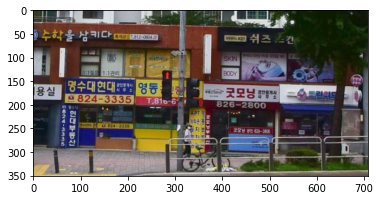

In [10]:
#4 google ocr ... . 실제이미지
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img_color = Image.open('/aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/img1.PNG')

img_color=np.array(img_color) # PIL로 열때는 np.array 까먹지 말기 

plt.imshow(img_color)
plt.show()

In [11]:
#4 pre action .. 전처리 함수 작성
def preprocess_sentence(sentence):
    
    # 한글 자음, 한글 모음
    sentence = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9:-]", "", sentence)
    sentence = sentence.strip()

    return sentence
print("슝=3")

슝=3


In [12]:
#4 pre action ..# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
def load_conversations():
    outputs = []
    for i in range(len(text_parts) - 1):
        # 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용.
        outputs.append(preprocess_sentence(text_parts[i]))
    outputs = [v for v in outputs if v]
    return outputs

print("슝=3")

슝=3


In [13]:
#4 google ocr ...  상가 간판 detection & recognization
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/16_excode/221104_exnode16_text_recog/images/formal-air-367603-67a3df2b48b3.json'

# 입력 이미지 경로를 지정해 주세요.
path = os.getenv('HOME')+'/aiffel/16_excode/221104_exnode16_text_recog/images/img1.PNG'  

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
img_text = detect_text(path)
text_parts = img_text[0].split('\n')

-rw-r--r-- 1 root root 2324 Nov  5 23:49 /aiffel/aiffel/16_excode/221104_exnode16_text_recog/images/formal-air-367603-67a3df2b48b3.json
Texts:

"① 수학을 삼키다 WEENGRECE
라
1:1질문 1:1관리
명수대현대 영동
공인중개사
사무소
824-3335
ㅣ용실
0824-3335
현대부동산
고 봅니다
BUL
824-3335
T.815-6
APT
뉴타운
부동산
굿모닝부
*****
SKIN
BODY
쉬즈 스킨
PREHE..
굿모닝 치한물개새
826-2800
굿모닝 관한 825-2800
- 크린위드
28M
www"

"①"

"수학"

"을"

"삼키다"

"WEENGRECE"

"라"

"1"

":"

"1"

"질문"

"1"

":"

"1"

"관리"

"명수대"

"현대"

"영동"

"공인중개사"

"사무소"

"824-3335"

"ㅣ"

"용실"

"0824-3335"

"현대"

"부동산"

"고"

"봅니다"

"BUL"

"824-3335"

"T.815-6"

"APT"

"뉴타운"

"부동산"

"굿모닝"

"부"

"*****"

"SKIN"

"BODY"

"쉬즈"

"스킨"

"PREHE"

".."

"굿모닝"

"치한"

"물개"

"새"

"826-2800"

"굿모닝"

"관한"

"825-2800"

"-"

"크린"

"위드"

"28M"

"www"
bounds: (674,151),(692,151),(692,155),(674,155)


In [14]:
#4 google ocr ... .상가 간판 detection & recognization
text1 = load_conversations()
print('전체 샘플 수 :', len(text1))


전체 샘플 수 : 22


In [15]:
#4 google ocr ... . ocr 측정 문자 & 실제간판문자 비교
y_label = ['수학을 삼키다','흑석관','812-0604','1:1질문','1:1관리','명수대현대','공인중개사','사무소','영동','824-3335','쉬즈','굿모닝','공인중개사','사무소','크린위드','826-2800']

cnt = 0
for i in y_label:
    if i in img_text[0]:
        cnt += 1

correct_rate = (cnt / (len(y_label)-1)) *100
print('실제문자대비 ocr문자측정비 : %.2f'% correct_rate, '%')

실제문자대비 ocr문자측정비 : 93.33 %
